## 20 newsgroup dataset Visualization

In this project, we aimed to visualize the 20 newsgroups dataset using t-SNE, a dimensionality reduction technique, to uncover underlying patterns and relationships within the data. Our approach began with meticulous data preprocessing, including text cleaning, stop word removal, and stemming/lemmatization, ensuring the data was in a suitable format for analysis.

In [2]:
## Necessary imports
import numpy as np
import seaborn as sns
from nltk.corpus import names
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.manifold import TSNE

In [3]:
## e first import the loader function for the 20 newsgroups data
from sklearn.datasets import fetch_20newsgroups
groups = fetch_20newsgroups()
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
## We can use the unique function from NumPy to find the distinct values for these integers
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

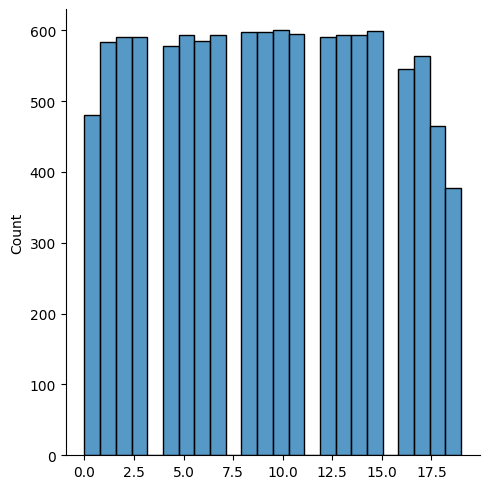

In [5]:
## Display the distribution of the classes to see if the data has uniform class distribution
sns.displot(groups.target)

In [10]:
groups.target_names[groups.target[3]]

'comp.graphics'

In [ ]:
##  We are utilizing the CountVectorizer class from scikit-learn to do the work
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)

In [ ]:
data_count[0]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

## Data preprocessing steps

In [ ]:
## We want Letter-only words so that numbers such as 00 and 000 and combinations of letter and number such as b8f will be removed

def is_letter_only(word):
    for c in word:
        if not c.isalpha():
            return False
    return True

data_cleaned = []

for doc in groups.data:
    doc_cleaned = ' '.join(word for word in doc.split()
                           if is_letter_only(word))
    data_cleaned.append(doc_cleaned)

In [ ]:
data_cleaned[:2]

['my WHAT car is University of College Park I was wondering if anyone out there could enlighten me on this car I saw the other It was a sports looked to be from the late early It was called a The doors were really In the front bumper was separate from the rest of the This is all I If anyone can tellme a model engine years of where this car is or whatever info you have on this funky looking please IL brought to you by your neighborhood Lerxst',
 'SI Clock Poll Final Call Final call for SI clock reports University of Washington A fair number of brave souls who upgraded their SI clock oscillator have shared their experiences for this Please send a brief message detailing your experiences with the Top speed CPU rated add on cards and heat hour of usage per floppy disk functionality with and m floppies are especially I will be summarizing in the next two so please add to the network knowledge base if you have done the clock upgrade and answered this Guy Kuo']

In [ ]:
doc_cleaned[:50]

'stolen California Institute of Pasadena usa see ab'

In [ ]:
## To remove different sets of stop words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'from', 'himself', 'nevertheless', 'already', 'hasnt', 'our', 'whereas', 'until', 'cannot', 'amount', 'these', 'co', 'anyhow', 'seeming', 'under', 'full', 'your', 'yourself', 'hence', 'who', 'many', 'themselves', 'latterly', 'besides', 'often', 'which', 'made', 'seemed', 'well', 'whereby', 'wherein', 'therein', 'me', 'hereby', 'cry', 'myself', 'whom', 'sincere', 'may', 'namely', 'sometimes', 'whence', 'are', 'every', 'noone', 'bottom', 'was', 'both', 'hereupon', 'us', 'although', 'two', 'herein', 'thence', 'as', 'they', 'perhaps', 'about', 'further', 'formerly', 'she', 'part', 'whereupon', 'fire', 'into', 'would', 'fill', 'we', 'becomes', 'in', 'my', 'few', 'where', 'con', 'upon', 'up', 'found', 'mine', 'yourselves', 'being', 'move', 'eg', 'here', 'itself', 'among', 'below', 'least', 'side', 'thus', 'during', 'via', 'beside', 'neither', 'always', 'even', 'twelve', 'ours', 'between', 'how', 'onto', 'first', 'whole', 'inc', 'become', 'whereafter', 'around', 'mill', 'whoever', 

## Stemming and Lemmatization

In [ ]:
from nltk.corpus import names
all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words="english",
max_features=500)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data_cleaned = []

for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)

data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

In [ ]:
print(count_vector_sw.get_feature_names_out()[:50])

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build']


## Visualization of 3 groups

In [ ]:
## let's use t-SNE to verify our count vector representation
## load documents of these three labels

categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(categories=categories_3)

In [ ]:
## Again doing all Data preprocessing steps
all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words="english",
max_features=500)


lemmatizer = WordNetLemmatizer()

data_cleaned = []

for doc in groups_3.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)

data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

In [ ]:
## Fitting the data
tsne_model = TSNE(n_components=2, perplexity=40,random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_3.toarray())

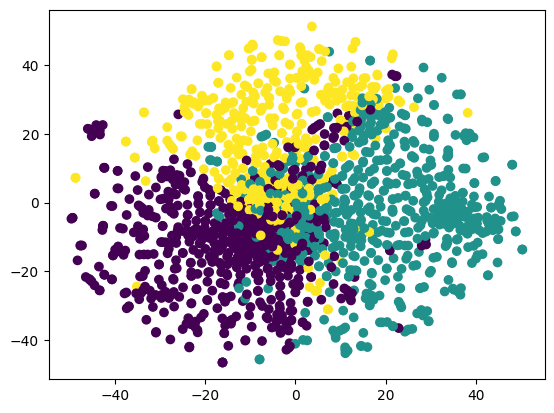

In [ ]:
# Plotting the 3 groups
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target)
plt.show()

Data points from the three topics are in different colors such as green, purple, and yellow.
We can observe three clear clusters. Data points from the same topic are close to each other
while those from different topics are far away. Obviously, count vectors are great
representations for original text data as they preserve distinction among three different
topics

## Visualization of 5 groups

In [ ]:
# Let's see how these 5 groups are represented in the plot
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
groups_5 = fetch_20newsgroups(categories=categories_5)

In [ ]:
# Doing all the preprocessing steps again
all_names = set(names.words())
count_vector_sw = CountVectorizer(stop_words="english",
max_features=500)


lemmatizer = WordNetLemmatizer()

data_cleaned = []

for doc in groups_5.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if is_letter_only(word) and word not in all_names)
    data_cleaned.append(doc_cleaned)

data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned)

In [ ]:
tsne_model = TSNE(n_components=2, perplexity=40,random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned_count_5.toarray())

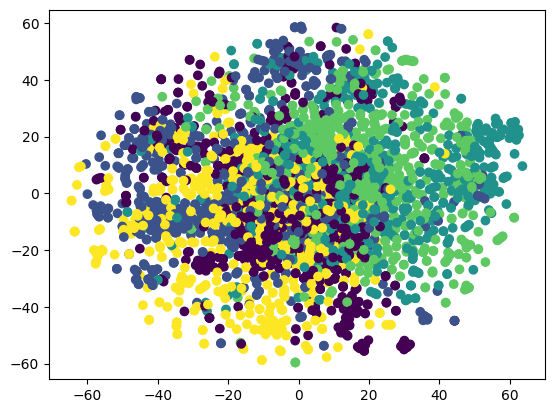

In [ ]:

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_5.target)
plt.show()

Data points from those five computer-related topics are all over the place, which means
they are contextually similar. To conclude, count vectors are great representations for
original text data as they are also good at preserving similarity among related topics.


In our visualization, data points representing the three topics are distinctly colored, with shades of green, purple, and yellow distinguishing between them. What's immediately evident is the presence of three distinct clusters. Points belonging to the same topic are tightly grouped together, showcasing their close proximity, while those from different topics are notably scattered, indicating their dissimilarity. This underscores the efficacy of count vectors as representations of the original text data. By preserving the nuances that differentiate between the three topics, count vectors prove to be invaluable in maintaining the integrity of the underlying information.

Furthermore, upon examining the visualization of the five computer-related topics, we observe a different pattern. Here, the data points are dispersed widely across the plot, suggesting contextual similarity among these topics. Despite their thematic differences, the computer-related topics exhibit significant overlap in their distribution. This further reinforces the effectiveness of count vectors in capturing the shared characteristics and nuances among related topics within the original text data.